### Autoencoders
We will explore:
1. **Stacked Autoencoders**
2. **Sparse Autoencoders**
3. **Variational Autoencoders**

**We will then visualize the Latent encodings provided by the autoencoders - by using TSNE to map the latent representations to 2 dimensions. It will allow us to see distinct clusters in the data.**

**We will also explore the idea of generative modeling - which allows us to generate data that never existed.**

We will also explore:
1. The difference between using a Dense Autoencoder vs a convolutional Autoencoder for Image data
2. Comparing the results of using Regular Autoencoder vs Variational Autoencoder for Generative Modeling



In [ ]:
from katlas.core import *

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:




from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from sklearn.manifold import TSNE
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [ ]:
train  =  pd.read_csv(r'/kaggle/input/mnist-in-csv/mnist_train.csv')
test  =  pd.read_csv(r'/kaggle/input/mnist-in-csv/mnist_test.csv')

In [ ]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train.label
X_train =train.drop('label', axis=1)/255

X_test = test.drop('label', axis = 1)/255
y_test = test['label']

X_train = X_train.values.reshape(X_train.shape[0], 28, 28)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28)


## Stacked Autoecoder

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.Dense(32, activation = 'selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(128, activation = 'selu', input_shape = (32, )),
    keras.layers.Dense(28*28, activation = 'sigmoid'),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.1))

history  =  stacked_ae.fit(X_train, X_train, epochs = 25, validation_data = (X_test, X_test))

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3703 - val_loss: 0.2472
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2368 - val_loss: 0.2073
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2023 - val_loss: 0.1836
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1807 - val_loss: 0.1694
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1689 - val_loss: 0.1613
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1613 - val_loss: 0.1546
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1543 - val_loss: 0.1479
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1480 - val_loss: 0.1424
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1428 - val_loss: 0.1382
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.138

Reconstruct From Test Data

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

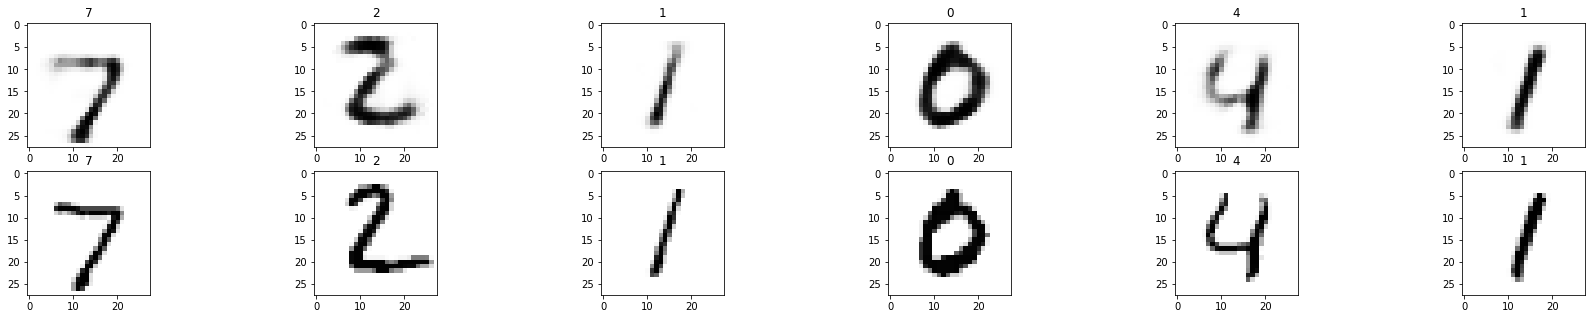

In [ ]:
to_predict = X_test[:6]
prediction = stacked_ae.predict(to_predict)

def visualize_predictions(predictions, data):
    fig, axes = plt.subplots(2, predictions.shape[0], figsize = (predictions.shape[0]*5, 5))
    for i, ax in zip(range(predictions.shape[0]), axes[0, :]):
        ax.imshow(predictions[i], cmap = 'Greys')
        ax.set_title(y_test[i])
    for i, ax in zip(range(predictions.shape[0]), axes[1, :]):
        ax.imshow(X_test[i], cmap = 'Greys')
        ax.set_title(y_test[i])    
    return plt

visualize_predictions(prediction, to_predict)

#### Let us map the latent representations to 2 dimensions

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)

Text(0, 0.5, 'tsne 2')

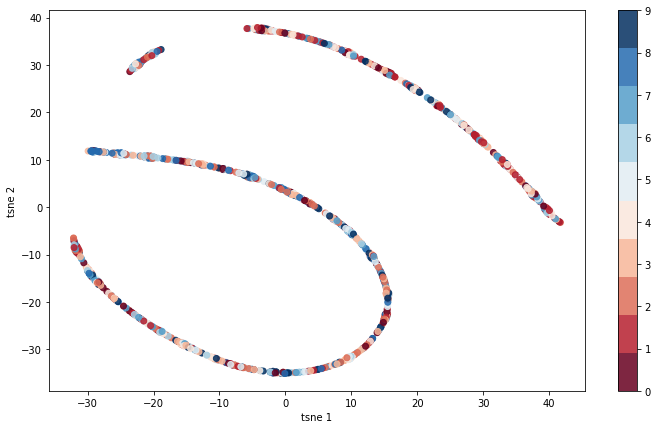

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

It Reconstructs well but let us add convolutions to make the quality better.
First, let us add regularization by building sparse autoencoders. This regularization can be applied to the coding layer.

## Sparse Autoencoder

In a sparse autoencoder, we restrict the activations of the middle layer to be sparse by adding an L1 Penalty to the activations of the middle layer. So, this means - that a lot of the activations of the middle layer will be zero - and the autoencoder will be forced to assign non-zero values only to the most important attributes of the data. 

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.Dense(32, activation = 'selu'),
    keras.layers.ActivityRegularization(l1=1e-3)
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(128, activation = 'selu', input_shape = (32, )),
    keras.layers.Dense(28*28, activation = 'sigmoid'),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.1))

history  =  stacked_ae.fit(X_train, X_train, epochs = 30, validation_data = (X_test, X_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4304 - val_loss: 0.2791
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2738 - val_loss: 0.2552
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - val_loss: 0.2345
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2312 - val_loss: 0.2191
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2169 - val_loss: 0.2080
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2074 - val_loss: 0.1996
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1991 - val_loss: 0.1930
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1934 - val_loss: 0.1873
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1874 - val_loss: 0.1823
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.182

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

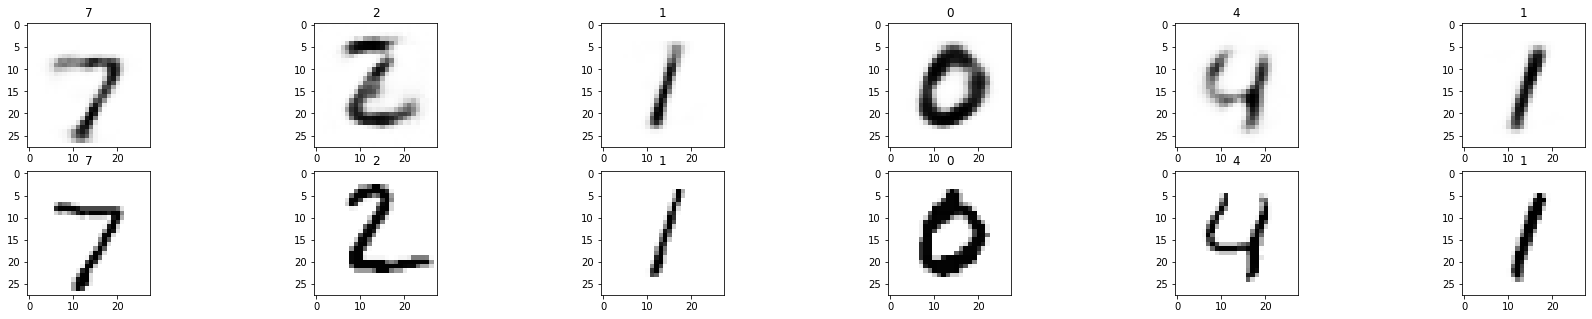

In [ ]:
to_predict = X_test[:6]
prediction = stacked_ae.predict(to_predict)

def visualize_predictions(predictions, data):
    fig, axes = plt.subplots(2, predictions.shape[0], figsize = (predictions.shape[0]*5, 5))
    for i, ax in zip(range(predictions.shape[0]), axes[0, :]):
        ax.imshow(predictions[i], cmap = 'Greys')
        ax.set_title(y_test[i])
    for i, ax in zip(range(predictions.shape[0]), axes[1, :]):
        ax.imshow(X_test[i], cmap = 'Greys')
        ax.set_title(y_test[i])    
    return plt

visualize_predictions(prediction, to_predict)

View the Latent Representation coded by the autoencoder by applying TSNE on the latent representation

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)

Text(0, 0.5, 'tsne 2')

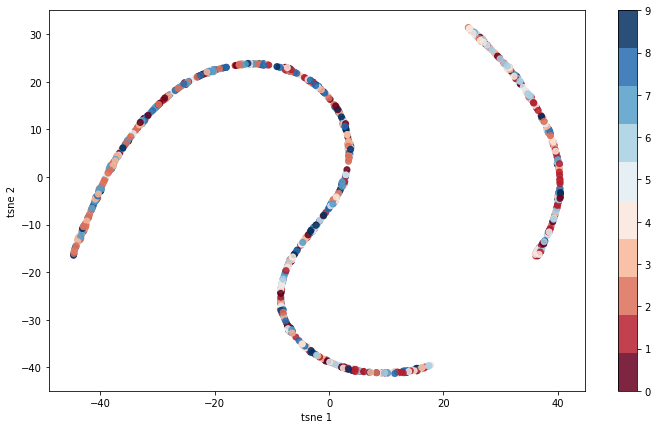

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

## Use CNNs to build the AutoEncoder

In [ ]:
y_train = train.label
X_train =train.drop('label', axis=1)/255

X_test = test.drop('label', axis = 1)/255
y_test = test['label']

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)


In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', input_shape = (28, 28, 1), padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),

])

stacked_decoder = keras.models.Sequential([
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', input_shape = (7,7,8), padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'),

    
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.1))

history  =  stacked_ae.fit(X_train, X_train, epochs = 10, validation_data = (X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1260 - val_loss: 0.0828
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0827 - val_loss: 0.0778
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0786 - val_loss: 0.0758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0765 - val_loss: 0.0767
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0753 - val_loss: 0.0736
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - val_loss: 0.0736
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0735 - val_loss: 0.0724
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0729 - val_loss: 0.0729
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - val_loss: 0.0713
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.072

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

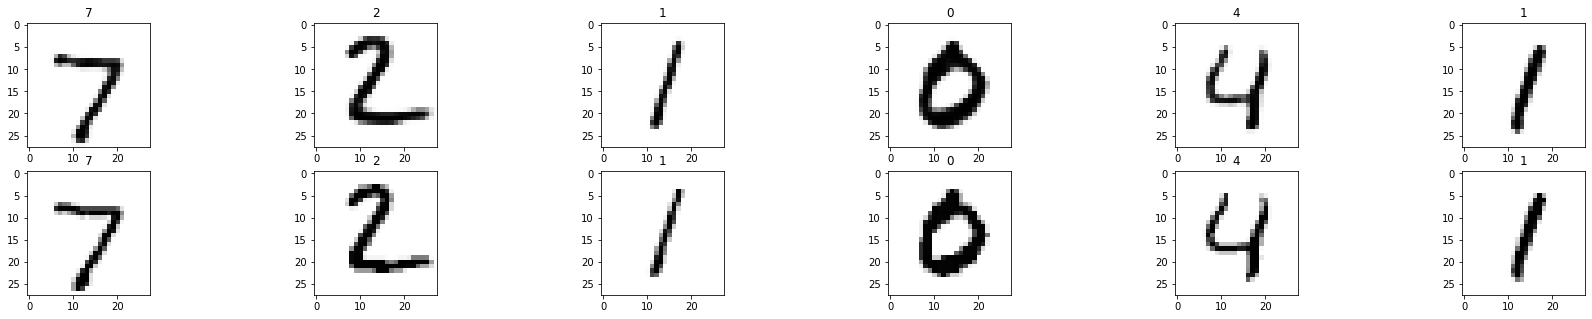

In [ ]:
to_predict = X_test[:6]
prediction = stacked_ae.predict(to_predict)

def visualize_predictions(predictions, data):
    fig, axes = plt.subplots(2, predictions.shape[0], figsize = (predictions.shape[0]*5, 5))
    for i, ax in zip(range(predictions.shape[0]), axes[0, :]):
        ax.imshow(predictions[i], cmap = 'Greys')
        ax.set_title(y_test[i])
    for i, ax in zip(range(predictions.shape[0]), axes[1, :]):
        ax.imshow(X_test[i], cmap = 'Greys')
        ax.set_title(y_test[i])    
    return plt

visualize_predictions(prediction, to_predict)

#### Visualize a Lower dimensional representation of the data - using the encoder output and applying TSNE

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)

Text(0, 0.5, 'tsne 2')

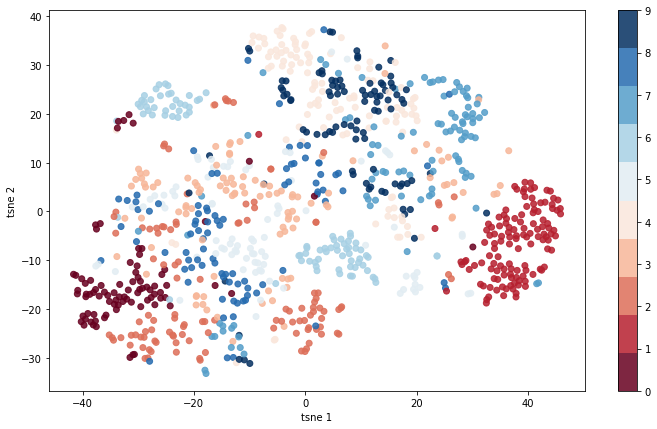

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

The clusters look very clear. The 4s occupy a place very close to 9s - which make sense because the tops of 4s and 9s look kindof similar. Similarly, 9 and 7 seem close - which makes sense as they have similar structure. So, our latent representation makes sense.

### Let us train another convolutional autoencoder - with different numbers of filters

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'selu', input_shape = (28, 28, 1), padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'selu', input_shape = (7,7,64), padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'selu', padding = 'valid'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'),    
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
optimizer = keras.optimizers.SGD(lr=.1)
optimizer = 'adam'
stacked_ae.compile(loss = 'binary_crossentropy', optimizer = optimizer)

history  =  stacked_ae.fit(X_train, X_train, epochs = 10, validation_data = (X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1322 - val_loss: 0.0782
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - val_loss: 0.0739
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0737 - val_loss: 0.0714
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0717 - val_loss: 0.0703
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0706 - val_loss: 0.0694
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0698 - val_loss: 0.0687
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0692 - val_loss: 0.0687
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0686 - val_loss: 0.0679
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.067

Text(0, 0.5, 'tsne 2')

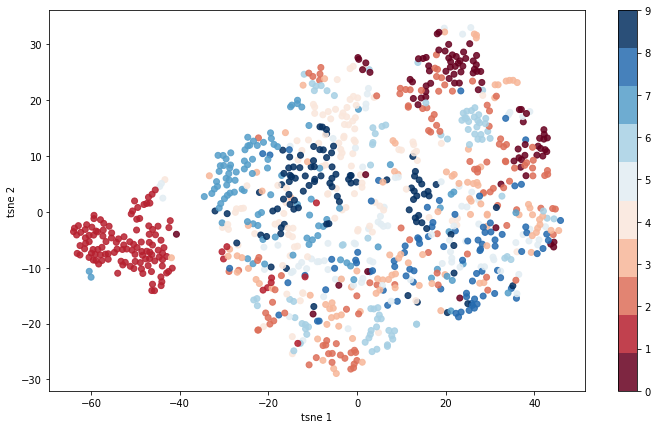

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

### Sparse Autoencoder - using Convolutions

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'selu', input_shape = (28, 28, 1), padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.ActivityRegularization(l1=1e-1)
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'selu', input_shape = (7,7,64), padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'selu', padding = 'valid'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'),    
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
optimizer = keras.optimizers.SGD(lr=.1)
optimizer = 'adam'
stacked_ae.compile(loss = 'binary_crossentropy', optimizer = optimizer)

history  =  stacked_ae.fit(X_train, X_train, epochs = 10, validation_data = (X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6594 - val_loss: 0.1515
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1447 - val_loss: 0.1677
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1416 - val_loss: 0.1222
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1190 - val_loss: 0.1122
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1207
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1065 - val_loss: 0.1022
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1651 - val_loss: 0.1359
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1276 - val_loss: 0.1160
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - val_loss: 0.1345
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.125

Text(0, 0.5, 'tsne 2')

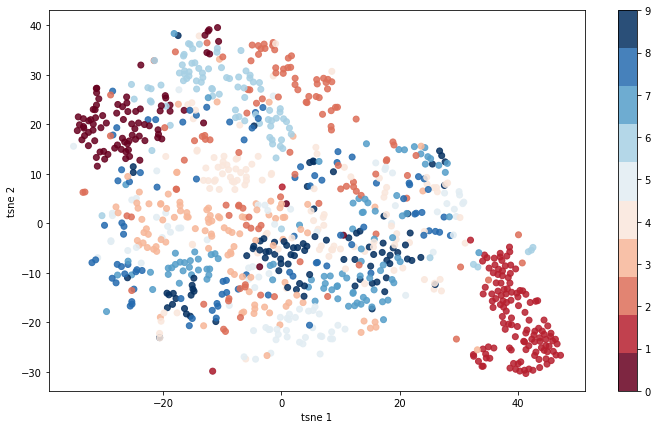

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

The 4s occupy a place very close to 9s - which make sense because the tops of 4s and 9s look kindof similar. Similarly, 9 and 7 seem close - which makes sense as they have similar structure. So, our latent representation makes sense.

## Denoising Autoencoder
1. Using Random normal Noise
2. Using Dropout

The idea is to corrupt the training data by noise, and use the autoencoder to reconstruct the training data. This way, the autoencoder learns to denoise the data - which once again, allows it to learn the essential features of the data.

#### Denoising after adding Random Noise to the inputs

In [ ]:
X_train_noisy = X_train + np.random.normal(0, .05, (X_train.shape[0], 28, 28, 1))
X_test_noisy = X_test + np.random.normal(0, .05, (X_test.shape[0], 28, 28, 1))


Plot one noisy data

<matplotlib.image.AxesImage>

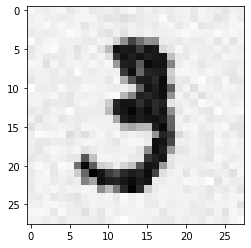

In [ ]:
plt.imshow(X_train_noisy[10].reshape(28, 28), cmap = 'Greys')

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', input_shape = (28, 28, 1), padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),

])

stacked_decoder = keras.models.Sequential([
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', input_shape = (7,7,8), padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'),

    
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.01))

history  =  stacked_ae.fit(X_train_noisy, X_train, batch_size = 128, epochs = 10,
                           validation_data = (X_test_noisy, X_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.2860 - val_loss: 0.1390
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1338 - val_loss: 0.1200
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1195 - val_loss: 0.1124
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1128 - val_loss: 0.1078
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1084 - val_loss: 0.1046
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1054 - val_loss: 0.1020
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1029 - val_loss: 0.1000
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1009 - val_loss: 0.0984
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0994 - val_loss: 0.0969
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0979 - val_loss: 0.0957

Text(0, 0.5, 'tsne 2')

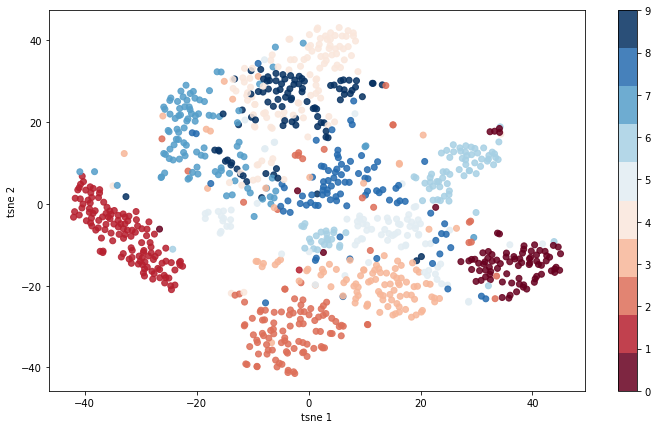

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

We see the overlap between 9, 7 and 4 which we discussed earlier. We also see slightoverlap between 2, 7 which also makes sense. Denoising allowed the neural network to only reliably encode the most important features of the inputs. The Unimportant features could not be relied upon due to the noisiness of the data.  

**Application**: Denoising Autoencoders not only lead to better dimensionality reduction which focuses more on the important features of the data, but can also be used for data denoising - as it has been trained on noisy data to recover the original data. 

#### Denoising using Dropout
Here, we apply dropout to the input pixels - and allow the network to reconstruct them. This is another variation of denoising autoencoders. We hope, at the end of this, the network will learn to reconstruct the missing pixels.

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', input_shape = (28, 28, 1), padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2, padding = 'same'),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),

])

stacked_decoder = keras.models.Sequential([
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', input_shape = (7,7,8), padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(8, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'selu', padding = 'same'),
    keras.layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'),

    
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.01))

history  =  stacked_ae.fit(X_train, X_train, batch_size = 128, epochs = 10,
                           validation_data = (X_test, X_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3552 - val_loss: 0.1625
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1566 - val_loss: 0.1389
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1363 - val_loss: 0.1248
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1227 - val_loss: 0.1177
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1156 - val_loss: 0.1143
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1110 - val_loss: 0.1095
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1077 - val_loss: 0.1082
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1051 - val_loss: 0.1059
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1031 - val_loss: 0.1053
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1013 - val_loss: 0.1034

Text(0, 0.5, 'tsne 2')

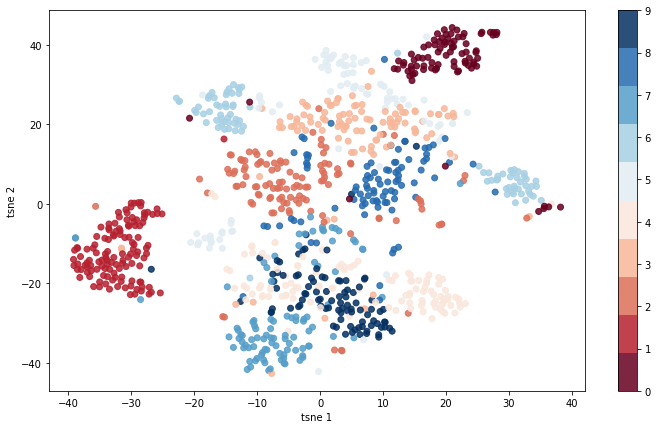

In [ ]:
# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test.iloc[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = stacked_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)

**Denoising Autoencoders gave a better distinction between clusters. It shows overlap between the clusters when it looks reasonable - like between 4, 9 and 3, 8.**

# Generative Modelling
#### Let us use the autoencoder as a generative model
The original autoencoder we built, does not perform well as a generative model. So, if we sampled random vectors from the latent space, we will most likely get an image that does not look like any digit from 0 - 9. Regular Autoencoders are good for performing Anomaly detection but do not work well as generative models. 

To make a good generative model, we need a Variational Autoencoder. 

However, let us compare and see what happens if we build a generative model from:
* A regular Autoencoder
* A Variational Autoencoder

##### Generative model from a Regular Autoencoder

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.Dense(32, activation = 'selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(128, activation = 'selu', input_shape = (32, )),
    keras.layers.Dense(28*28, activation = 'sigmoid'),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.1))

history  =  stacked_ae.fit(X_train, X_train, epochs = 25, validation_data = (X_test, X_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3824 - val_loss: 0.2528
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2439 - val_loss: 0.2168
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2116 - val_loss: 0.1923
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1904 - val_loss: 0.1789
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1782 - val_loss: 0.1704
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1703 - val_loss: 0.1629
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1629 - val_loss: 0.1560
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1562 - val_loss: 0.1507
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1512 - val_loss: 0.1459
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.146

Let us store the stastical properties of the latent space present in the training data. We will then sample 'Artificial Data' from this.

In [ ]:
# Extract the minimum and maximum values of the latent space. 
latent = pd.DataFrame(stacked_encoder.predict(X_train), columns = [str(i) for i in range(32)])
mins = latent.min(axis = 0).values
maxs = latent.max(axis = 0).values
mean = latent.mean(axis = 0).values
stddev = latent.std(axis = 0).values
#print(latent.describe())

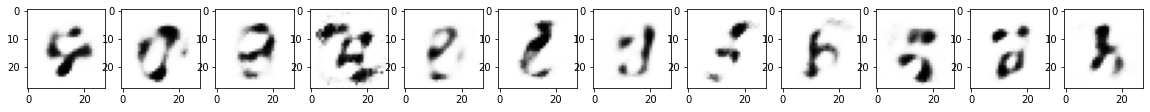

In [ ]:
# Create some data by sampling at random from the latent space - from a normal distribution
codings = tf.random.normal(mean = mean, stddev = stddev, shape = [12, 32])
#codings = tf.random.uniform(minval = mins, maxval = maxs, shape = [12, 32])
images = stacked_decoder(codings).numpy()
def plot(mat):
    n = mat.shape[0]
    fig, axes = plt.subplots(1, n, figsize = (20, 4))
    for image, ax in zip(mat, axes):
        ax.imshow(image, cmap = 'Greys')
        
plot(images)

As we can see, the autoencoder did not work well as a generative model - as the artificial images generated do not look real. However, we can see it did capture the broad strokes.

## Generative Modeling - Variational Autoencoders(VAE)
Variational Autoencoders are better for Generative modelling. We can use them to construct new data. As we shall see, data generated by VAE will look more real.

In [ ]:
y_train = train.label
X_train =train.drop('label', axis=1)/255

X_test = test.drop('label', axis = 1)/255
y_test = test['label']

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)


In [ ]:
class sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var))*K.exp(log_var/2)+mean

In [ ]:
########### Encoder Part ###########
codings_size = 10
inputs = keras.layers.Input(shape = [28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation = 'selu')(z)
z = keras.layers.Dense(100, activation = 'selu')(z)
codings_mean = keras.layers.Dense(codings_size)(z) #Mean Encoding 
codings_log_var = keras.layers.Dense(codings_size)(z) #LogVar Encoding
codings = sampling()([codings_mean,  codings_log_var])
variational_encoder = keras.Model(inputs = [inputs], 
                                  outputs = [codings_mean, codings_log_var, codings])

########### Decoder Part ###########
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation='selu')(decoder_inputs)
x = keras.layers.Dense(150, activation='selu')(x)
x = keras.layers.Dense(28*28, activation='sigmoid')(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs = [decoder_inputs], outputs = [outputs])

########### Formalize autoencoder Model ##########
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs = [inputs], outputs = [reconstructions])

########## Define Latent Loss ##############
latent_loss = -0.5 *K.sum(1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), 
                          axis = -1)
variational_ae.add_loss(K.mean(latent_loss)/784.)
variational_ae.compile(loss='binary_crossentropy', optimizer='adam')

########## Fit Model ###########
history = variational_ae.fit(X_train, X_train, epochs=70, batch_size=256,
                            validation_data=(X_test, X_test))

Epoch 1/70
235/235 [==============================] - 2s 5ms/step - loss: 0.3158 - val_loss: 0.1911
Epoch 2/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1873 - val_loss: 0.1755
Epoch 3/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1731 - val_loss: 0.1653
Epoch 4/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1652 - val_loss: 0.1597
Epoch 5/70
235/235 [==============================] - 1s 4ms/step - loss: 0.1599 - val_loss: 0.1562
Epoch 6/70
235/235 [==============================] - 1s 4ms/step - loss: 0.1566 - val_loss: 0.1534
Epoch 7/70
235/235 [==============================] - 1s 4ms/step - loss: 0.1541 - val_loss: 0.1518
Epoch 8/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1519 - val_loss: 0.1499
Epoch 9/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1508 - val_loss: 0.1488
Epoch 10/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1500 - val_loss: 0.1482

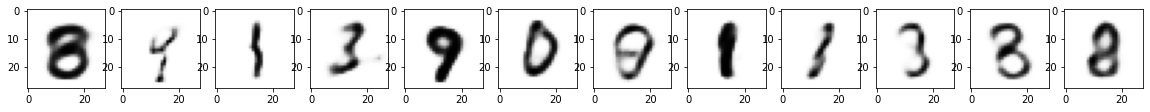

In [ ]:
codings = tf.random.normal(shape = [12, codings_size])
images = variational_decoder(codings).numpy()
def plot(mat):
    n = mat.shape[0]
    fig, axes = plt.subplots(1, n, figsize = (20, 4))
    for image, ax in zip(mat, axes):
        ax.imshow(image, cmap = 'Greys')
        
plot(images)

As we can see, these images generated by the Variational Autoencoder look better than the ones generated through a regular autoencoder.